In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os

# Añadir el directorio raíz al path para poder importar src
sys.path.append(os.path.abspath(os.path.join('..', '..')))

from src import config, data_loader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Cargamos los datos crudos usando la función que definimos en src/data_loader.py
df = data_loader.load_raw_data()

df.head()

🔄 Cargando datos desde: C:\Users\Arnau Climent\OneDrive\Documentos\GitHub\proyecto-final-ml\data\raw\dataset_practica_final.csv
✅ Datos cargados. Shape inicial: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Porcentaje de valores nulos por columna:

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64


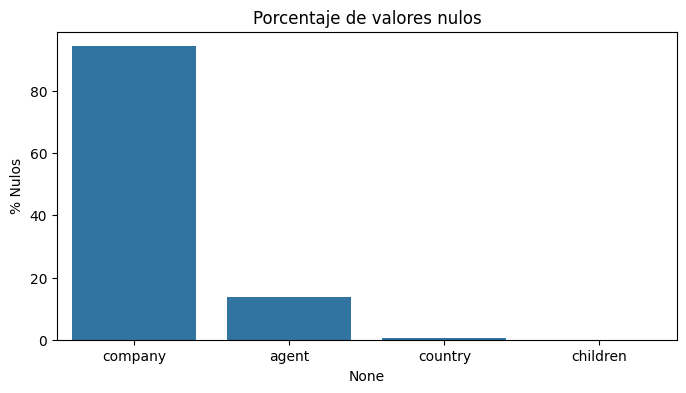

In [10]:
# Calcular porcentaje de nulos
nulls = df.isnull().mean() * 100
nulls = nulls[nulls > 0].sort_values(ascending=False)

print("Porcentaje de valores nulos por columna:\n")
print(nulls)

plt.figure(figsize=(8, 4))
sns.barplot(x=nulls.index, y=nulls.values)
plt.title("Porcentaje de valores nulos")
plt.ylabel("% Nulos")
plt.show()



La variable 'company' tiene más del 90% de nulos. Probablemente debamos eliminarla.
 'agent' tiene muchos nulos, quizás signifique que la reserva se hizo sin agente (imputar con 0).

---------------------

  reservation_status  is_canceled
0          Check-Out            0
1          Check-Out            0
2          Check-Out            0
3          Check-Out            0
4          Check-Out            0


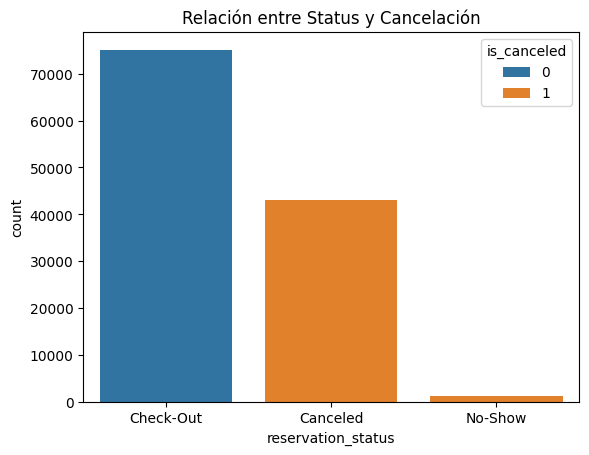

In [11]:
# Comprobamos la correlación de la variable 'reservation_status' con el target
# Si sale 1.0 (o muy cerca), es un dato irrelevante/tramposo.
leaky_cols = ['reservation_status', 'is_canceled']
print(df[leaky_cols].head())

# Verificamos visualmente
sns.countplot(x='reservation_status', hue='is_canceled', data=df)
plt.title("Relación entre Status y Cancelación")
plt.show()



La celda de correlación nos sirve para detectar que esa columna es un "chivato" (tiene la respuesta escrita) y debemos borrarla para que el modelo se esfuerce en aprender patrones reales (como "la gente que reserva con X días de antelación cancela más") en lugar de leer la solución.

----------------------------

#### Averiguar si las clases están desbalanceadas

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


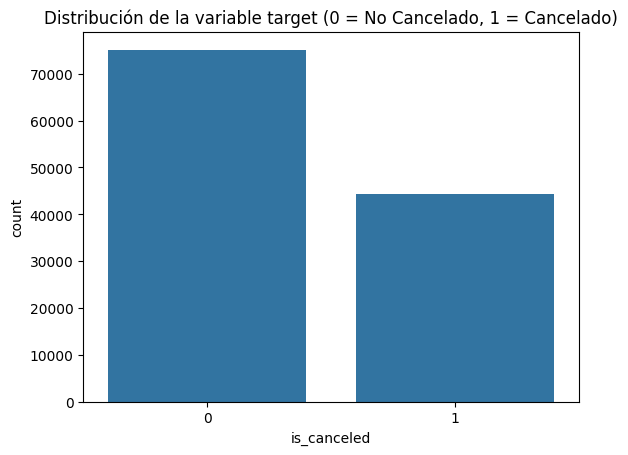

In [12]:
target_count = df['is_canceled'].value_counts(normalize=True)
print(target_count)

sns.countplot(x='is_canceled', data=df)
plt.title("Distribución de la variable target (0 = No Cancelado, 1 = Cancelado)")
plt.show()

# consideramos un 60/40 como un desbalance aceptable

---------------------------------

LIMPIEZA

In [13]:
df_raw = data_loader.load_raw_data()
df_clean = data_loader.clean_data(df_raw)

print("\nVerificación de nulos restantes:")
print(df_clean.isnull().sum().sum())  # Debería dar 0

🔄 Cargando datos desde: C:\Users\Arnau Climent\OneDrive\Documentos\GitHub\proyecto-final-ml\data\raw\dataset_practica_final.csv
✅ Datos cargados. Shape inicial: (119390, 32)
🧹 Duplicados eliminados: 31994
🚫 Columna 'company' eliminada (>90% nulos)
🚫 Columnas de Leakage eliminadas: ['reservation_status', 'reservation_status_date']
✅ Limpieza completada. Shape final: (87396, 29)

Verificación de nulos restantes:
0


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

Porcentaje de valores nulos por columna:

Series([], dtype: float64)


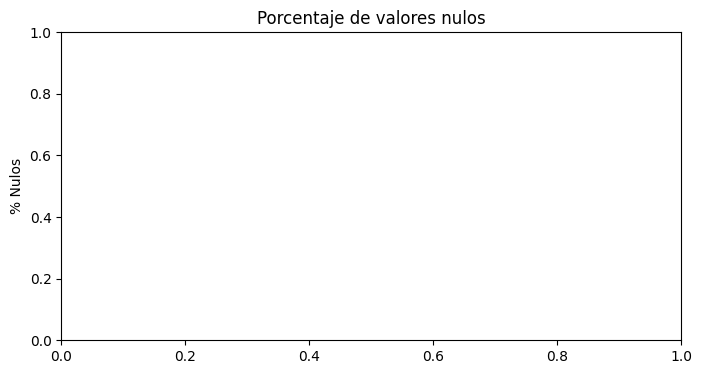

In [16]:
# Calcular porcentaje de nulos
nulls = df_clean.isnull().mean() * 100
nulls = nulls[nulls > 0].sort_values(ascending=False)

print("Porcentaje de valores nulos por columna:\n")
print(nulls)

plt.figure(figsize=(8, 4))
sns.barplot(x=nulls.index, y=nulls.values)
plt.title("Porcentaje de valores nulos")
plt.ylabel("% Nulos")
plt.show()